### 선형회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

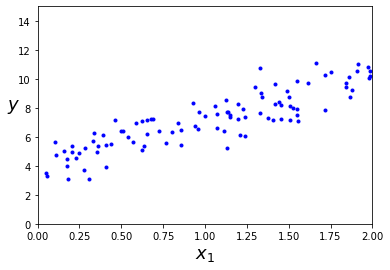

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

모델을 훈련시킨다는 것은 모델이 훈련세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어 맞는지 츠정해야 한다. 회귀 에서 가장 널리 사용되는 성능지표는 RMSE인데 이를 최소화하는 세타를 찾아야 한다.  
실제로는 RMSE보다 MSE를 최소하는것이 같은 결과를 내면서 더 간단하다.

### 정규 방정식
비용함수를 최소화하는 세터값을 찾기 위한 해석적인 방법이 있다. 다른 말로 하면 바로 결과를 얻을 수 있는 수학공식이 있다. 이를 정규방정식이라고 한다.

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$  
세타햇은 비용함수를 최소화하는 세타  
y는 y1부터 ym까지 포함하는 타깃 벡터 

 넘파이 선형대수 모델 np.linalg에 있는 inv함수를 통해 역행렬을 계산하고 dot()메서드를 통해 행렬 곱셈을 진행  
 np.c_ 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

In [4]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 X0 =1 를 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.10663183],
       [3.02789692]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 X0 =1 를 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.10663183],
       [10.16242566]])

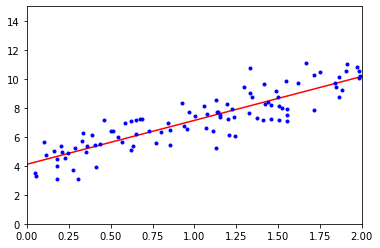

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [9]:
reg.intercept_ , reg.coef_

(array([4.10663183]), array([[3.02789692]]))

In [10]:
reg.predict(X_new)

array([[ 4.10663183],
       [10.16242566]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있다

In [11]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 쓴다

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10663183],
       [3.02789692]])

이 함수는  𝐗+𝐲 을 계산합니다.  𝐗+ 는  𝐗 의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있다

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.10663183],
       [3.02789692]])

### 경사하강법(gradient descent, GD) 
여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 경사하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

짙은 안개 때문에 산속에서 길을 잃었다고 가정해보자 발밑 지면의 기울기만 느낄 수 있다. 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것이다. 이것이 바로 경사하강법의 원리이다. 파라미터 벡터 세타에 대해 비용함수의 현재 기울기를 계산하다. 그리고 기울기가 감소하는 방향으로 진행된다. 기울기가 0이 되면 최솟값에 도달한 것이다.

세타를 임의의 값으로 시작해서(무작휘 초기화 ,random initailization) 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴 할때까지 점진적으로 향상시킨다.

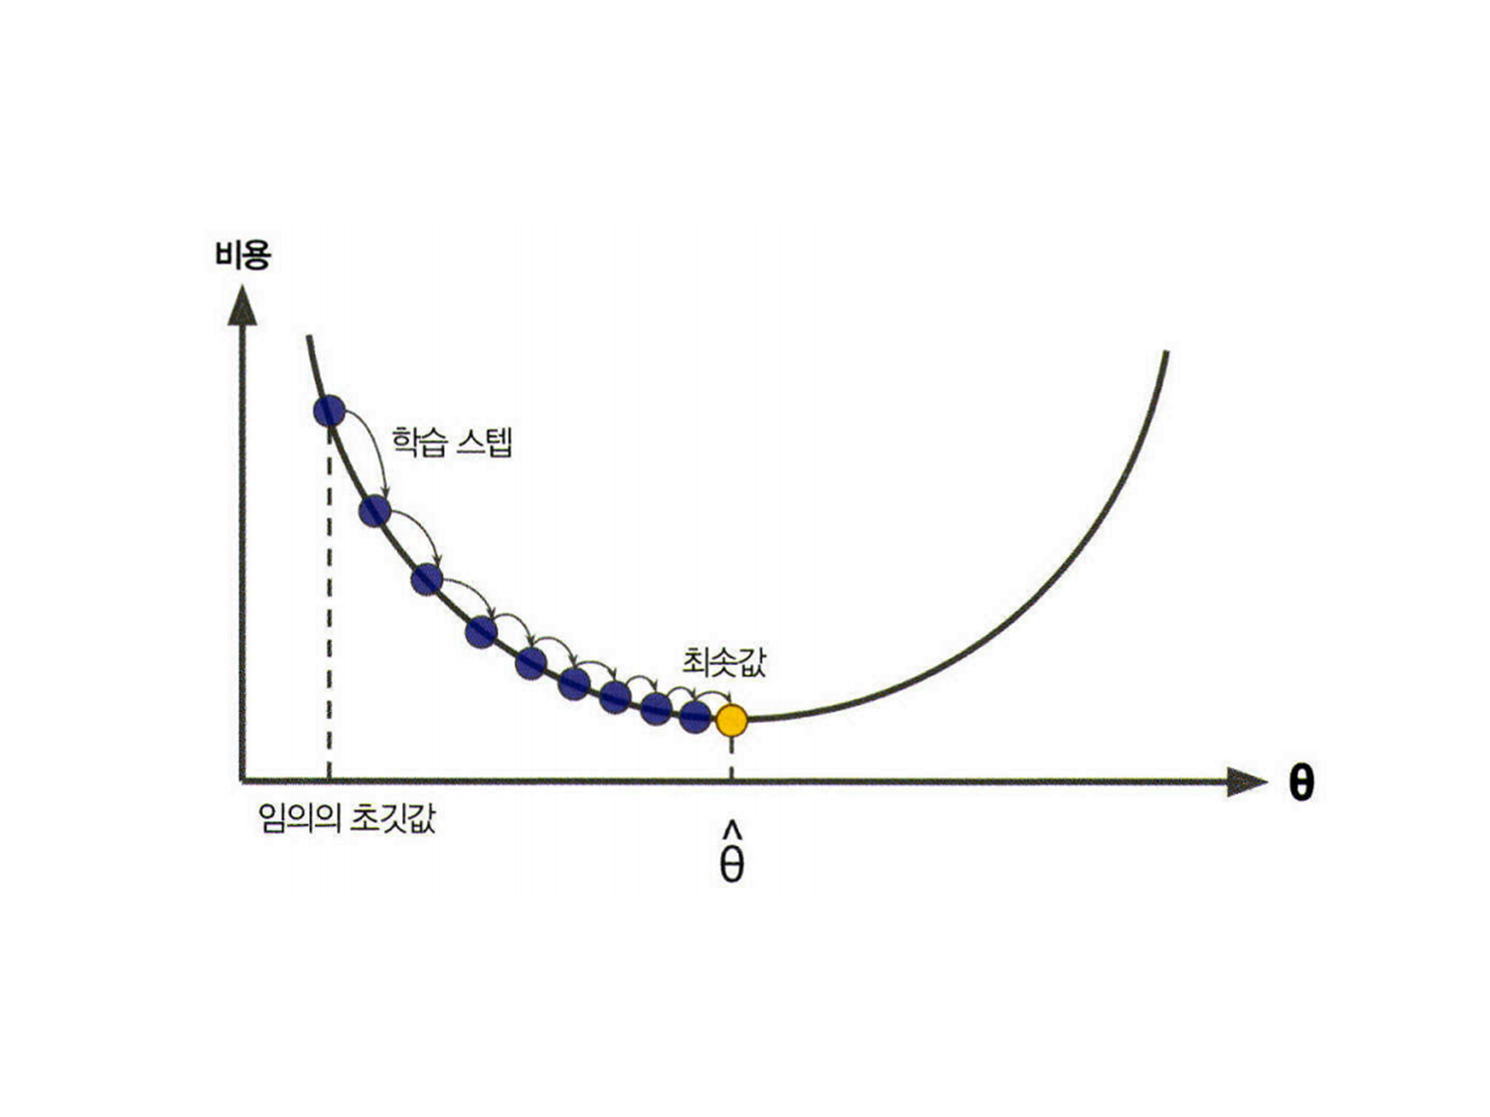

    경사 하강법에서 중요한 파라미터는 step의 크기로 학습률(learning rate) 하이퍼파라미터로 결정 된다. 학습률이 너무 작으면 알고지름이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.

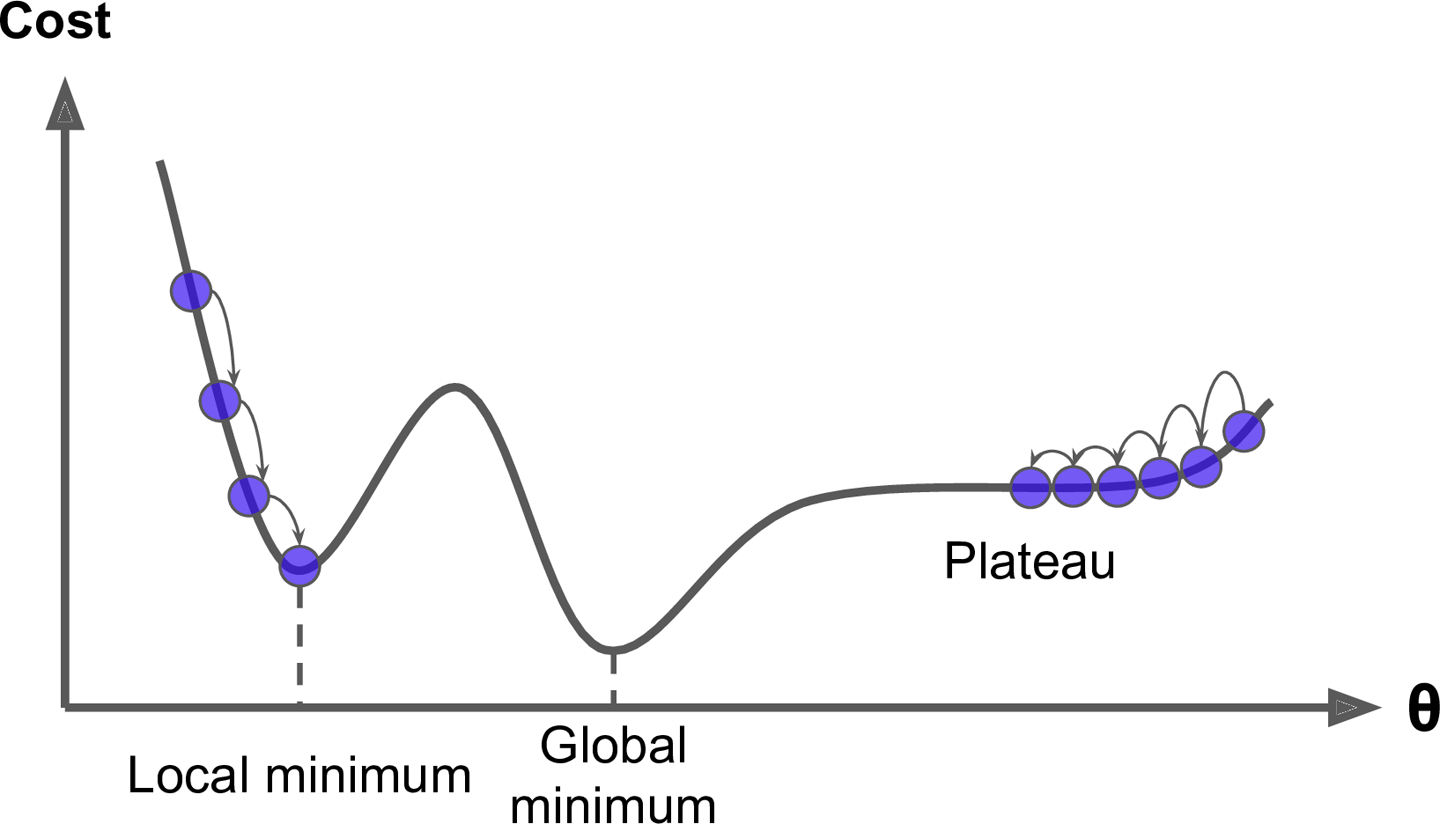


모든 비용함수가 매끈한 그릇과 같지는 않다. 위 그림은 경사하강법의 두가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimium)보다 덜 좋은 지역 최솟값(local minumum)에 수렴한다.   

알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다. 

선형 회귀를 위한 MSE 비용함수는 곡선에서 어떤 두점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수(convex function)이다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 이 두 사실로 부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다. 

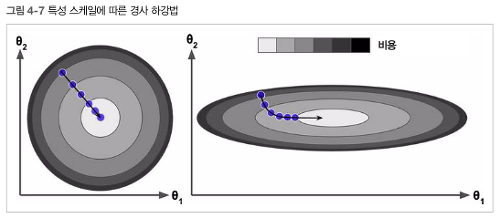

    위의 그림에서 볼 수 있듯이 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다. 반면에 오른쪽 그래프는 처음엔 전역 최솟ㄱ밧의 방향에 거의 직각으로 향하다가 평평한 골짜기를 돌아서 나간다. 결국 최솟값에 도달하겠지만 시간이 오래 걸릴것이다. 
    
    

    경사하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. 그렇지 않으면 수렴하는데 휠씬 오랜시간이 소요
  

### 배치 경사 하강법 
경사 하강법을 구현하려면 각 모델 파라미터 세타j에 대해 비용함수의 기울기를 계산해야 한다. 세타j가 조금 변경될때 비용함수가 얼마나 바뀌는지 계산해야한다. 을 **편도함수(partial derivative)** 라고한다.  


**비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식  경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

공식은 매 경사 하강법 스템에서 전체 훈련세트 X에 대해 계산한다. 그래서 이 알고리즘을 **배치 경사 하강법**이라고 한다. 즉 매 스템에서 훈련데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련세트에서는 아주 느리다. 그러나 경사하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형회귀를 훈련시키려면 정규방정식이나 SVD분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

In [13]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.10663183],
       [3.02789692]])

In [15]:
X_new_b.dot(theta)

array([[ 4.10663183],
       [10.16242566]])

    정규방정식으로 찾은 값과 같다.

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

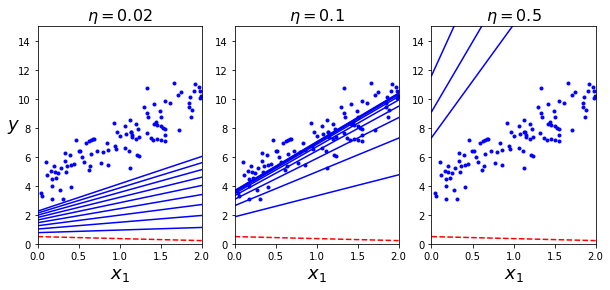

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

    왼쪽의 학습률이 너무 낮다. 알고리즘은 최적점에 도달하지겠지만 시간이 오래 걸릴것이다.   
    가운데는 학습률이 적당하다. 반복 몇번 만에 이미 최적점에 수렴한다.   
    오른쪽으로 학습률이 너무 높다. 알고리즘이 산발적으로 스템마다 최적점에서 점점 더 멀어져 발산한다.  
    
    적절한 학습률을 찾기 위해서는 그리드 탐색을 사용한다. 하지만 그리스 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 휘해 반복횟수를 제한한다.
    반복횟수는 어떻게 지정할까? 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다. 너무크면 모델파라미터가 더는 변하지 않는 동안 시간을 낭비한다
    해결책은 반복횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면 , 즉 벡터의 노름이 어떤 값(허용오차) 보다 작아지면 경사 하강법이 최솟값에 도달한 것으로 알고리즘을 중단한다.

### 확률적 경사 하강법 

     배치 경사 하강법의 가장 큰 문제는 매 스템에서 전체 훈련 세트를 사용해 그레디언트를 계산한다는 사실이다 훈련 세트가 커지면 매우 느려지게 된다
     
     이와는 정반대로 확률적 경사 하강법은 매 스템에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.
     매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한번에 하나의 샘플을 처리하면 알고리즘이 확실히 속도가 빠르다. 
     또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트로 훈련 시킬 수 있다.
     
 
    

 #### 확률적 , 배치 경사 하강법 차이점 
 확률적 경사 하강법은 무작위성을 갖고 있으므로(확률적) 배치 경사 하강법보다 훨씬 불안정하다. 비용함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소 한다. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할것이다. 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.
 
 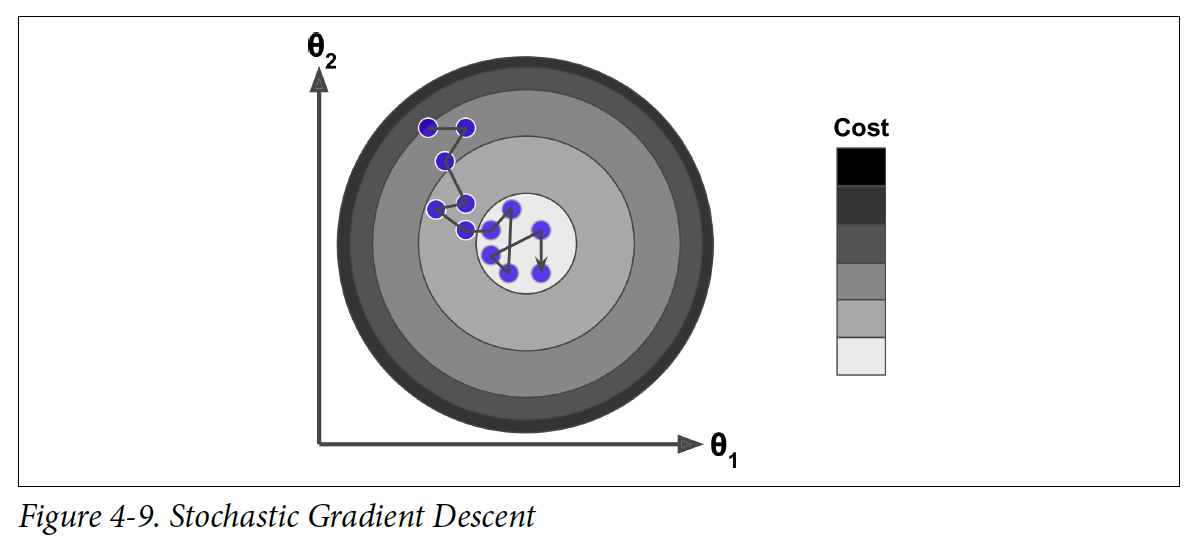
 
 
 무작위성은 지역 최솟값에서 탈출시켜서 좋지만 알고리즘이 전역 최솟값에 다다르지 못하게 한다는 점에는 좋지 않다. 딜레마를 해결하는 한가지 방법은 학습률을 점진적으로 감소시키는것이다.   
 매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 부른다. 

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

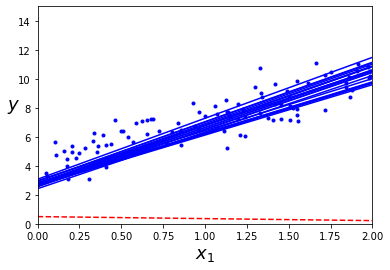

In [19]:
# 학습스케줄을 사용한 확률적 경사 하강법 

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
                              
plt.show()                                           

일반적으로 한 반복에서 m번 되풀이 되고 이때 각 반복을 epoch라고 한다. 배치 경사 하강법 코드가 전체 훈련세트에 대해 1000번 반복하는 동안 위 코드는 훈련세트에서 50번만 반복하고도 좋은값을 도출  

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 epoch에서 여러번 선택 될 수 있고 어떤 샘플은 전혀 선택되지 못할 수 도 있다. 알고리즘이 epoch마다 모든 샘플을 사용하게 하려면 훈련세트를 섞은 후 차례대로 하나씩 선택하고 다음 epoch에서 다시 섞는 식의 방법을 사용할 수 있다.

In [20]:
theta

array([[4.10784781],
       [3.04438813]])

sklearn에서 SGD방식으로 선형 회귀를 사용하려면 기본값으로 제곱오차비용함수를 최적화 하는 SGDRegressor 클래스를 사용  

In [21]:
from sklearn.linear_model import SGDRegressor

#max_iter 1000번 epoch
# tol 0.001 보다 적게 손실이 줄어들때까지 실행 
# eta 학습률 0.1
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3 , penalty = None , eta0 = 0.1)
sgd_reg.fit(X ,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.06144188]), array([2.98795232]))

### 미니 배치 경사 하강법

미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다. 확률적 경사 하강법에 비해 미니배치 경사 하강법의. 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.  

미니배치를 어느정도 크게하면 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.10176336],
       [3.02113079]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

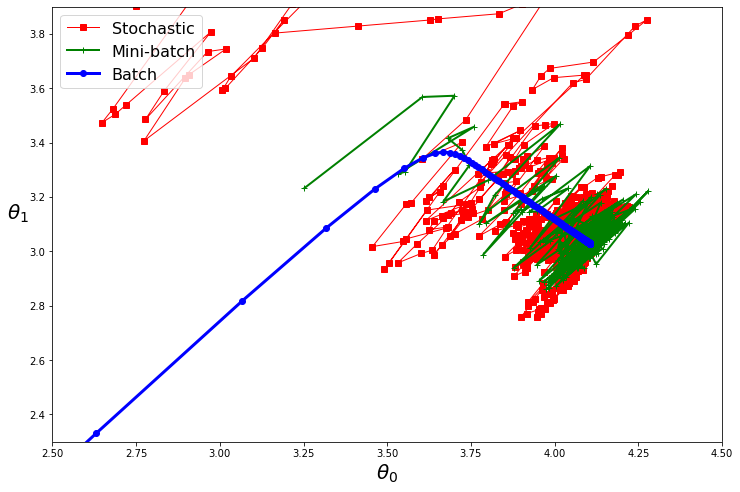

In [26]:
plt.figure(figsize=(12,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()


#### 세가지 경사하강법 알고리즘이 훈련과정 동안 파라미터 공간에서 움직인 경로  
모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적, 미니배치 경사 하강법은 근처에서 맴돌고 있다. 그렇지만 배치경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적, 배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달한다는 것을 인지

### 다항회귀

비선형 데이터를 학습하는데 선형모델 사용  
**각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.**

In [27]:
# 2차 방정식으로 비선형 데이터 생성 

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m ,1) -3
y = 0.5  * X**2 + X+2 + np.random.randn(m, 1)

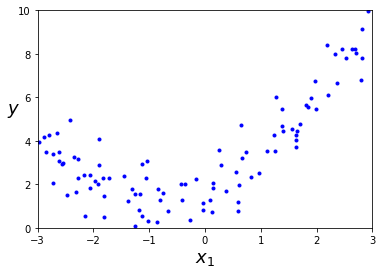

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

In [29]:
# PolynomialFeature 사용해 훈련데이터 변환 , 훈련세트에 각 특성을 제곱하여 새로운 특성으로 추가

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree =2 , include_bias= False)
X_poly = poly_features.fit_transform(X)

In [30]:
X[0]

array([-0.75275929])

In [31]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

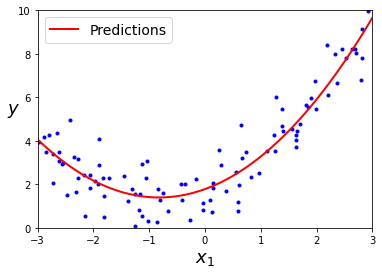

In [33]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

### 학습곡선


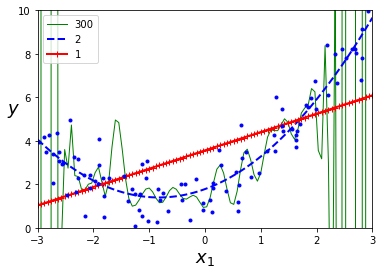

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

고차 다항 회귀를 적용하면 보통의 선형회귀보다 훨씬 더 훈련 데이터에 잘 맞추려고 할 것이다.   
위의 고차 다항 회귀 모델은 심각하게 훈련데이터에 과대적합되 있다. 반면에 선형 모델은 과소적합이다. 이 경우 일반화가 잘될 모델은 2차 다항회귀이다. 
2차 방정식으로 생성한 데이터 이기 때문에 당연한 결과지만 일반적으로는 어떤 함수로 데이터가 생성되었는지 알 수 없다.

#### 얼마나 복잡한 모델을 사용할지 어떻게 결정할까?  , 어떻게 모델이 데이터에 과대적합 또는 과소적합이 되었는지 알 수 있을까? 
모델에 일반화 성능을 추정하기 위해 교차검증을 사용할 수 있다.**또 다른 방법으로는 학습곡선을 살펴보는 방법이 있다.** 

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

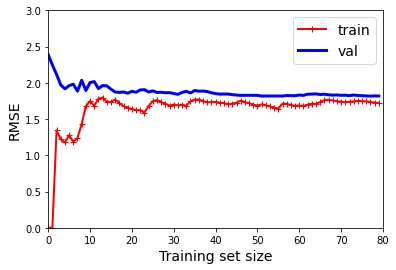

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        

plt.show()                                      

그래프는 훈련세트와 검증세트의 모델 성능을 훈련 세트크기(또는 훈련반복)의 함수로 나타낸다. 그래프를 생성하기 위해서는 단순히 훈련세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.

훈련데이터의 성능 ,0에서 시작하므로 훈련세트에 하나 혹은 두개의 샘플이 있을땐 모델이 완벽하게 작동한다. 하지만 훈련세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련데이터를 완벽히 학습하는 것이 불가능 해진다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다.  

검증데이터에 대한 모델성능, 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 크다. 모델에 훈련샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다. 하지만 선형회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해저서 훈련 세트의 그래프와 가까워 진다. 

**이 학습곡선은 과소적합의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있기 때문**

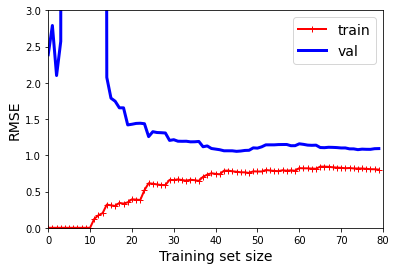

In [37]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()                        

위 학습곡선은 훈련데이터에 오차가 선형회귀모델보다 훨씬 낮다.   
두 곡선 사이에 공간이 존재, 즉 훈련 데이터에서의 모델 성능이 검증 데이터에서부터 훨씬 낮다는 뜻이다. 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워 진다.

#### 편향/분산 트레이드 오프 
모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다.

* 편향: 일반화 오차중에서 편향은 잘못된 가정으로 인한 것이다. 데이터가 실제로는 2차인데 선형으로 가정하는 경우, 편향이 큰 모델은 훈련데이터에 과소적합되기 쉽다.

* 분산: 훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델(예를 들면 고차다항회귀모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.

* 줄일 수 없는 오차: 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것이다.

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다.

### 규제가 있는 선형 모델 

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 자유도를 줄이면 데이터에 과대적합되기 어려워진다.   
다항회귀모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.  
선형회귀모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 

### 릿지회귀
규제가 추가된 선형회귀 버전이다. 규제항이 비용함수에 추가된다. 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력한다. 규제항은 훈련하는 동안에만 비용함수에 추가된다. 모델으 훈련이 끝나면 모델의 성능을 규제가 없는 성능지표로 평가한다.

**릿지 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

하이퍼파라미터 a는 모델을 얼마나 많이 규제할지 조절, a가 0이면 릿지회귀는 선형회귀와 같아진다. a가 아주 크면 모든 가중치가 거의 0에 가까줘지고 결국 데이터의 평균을 지나는 수평선이 된다.  

**릿지회귀는 입력특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다.**

In [38]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [40]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

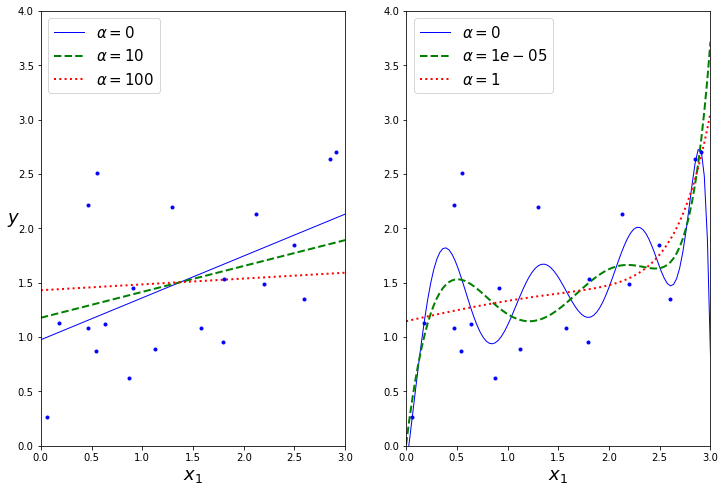

In [42]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

    선형데이터에 몇가지 다른 a를 사용해 릿지 모델을 훈련시킨 결과이다. 왼쪽그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만든것
    오른쪽 그래프는 PolynomialFeature(degree = 10)을 사용해 먼저 데이터를 확장하고 StadardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용한 것이다. 결국 이는 릿지 규제를 사용한 다항회귀가 된다. a를 증가시킷

In [43]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])